# combine master files

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [33]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, pandas, matplotlib, ysfitsutilpy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** ysfitsutilpy module is already installed.
******** astropy module is already installed.
******** photutils module is already installed.
******** ccdproc module is already installed.
******** version_information module is already installed.
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2024-09-25 06:44:50 (KST = GMT+0900) 
0 Python     3.12.4 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 5.15.0 122 generic x86_64 with glibc2.31
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.9.2
6 ysfitsutilpy 0.2
7 astropy    6.1.0
8 photutils  1.12.0
9 ccdproc    2.4.2
10 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [34]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
#from astropy.stats import sigma_clip
#from ccdproc import combine, ccd_process, CCDData
from astropy.io import fits
import matplotlib.pyplot as plt

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities
import _tool_visualization

# 프로젝트 폴더 

파일명을 통해 프로젝트를 확인하기 위하여 폴더명/파일명은 다음과 같은 규칙으로 저장하고 있다. 
폴더명(파일명) 구조: object name]_[image type]_[filter]_[OBS datetime]_[exptime]_[optic name]_[detector name]_[OBS temperature]_[binning].fit

그리고 프로젝트 마다 폴더를 구분하여 저장하고 있으며, 프로젝트 폴더마다 전처리를 동일한 파일로 수행하는 방법을 택하고 있다. 
전처리 파일은 "CAL-BDF" 폴더에 모두 넣어두고 마스터 파일을 만든다.

폴더명/파일명은 pathlib을 이용하여 처리한다.

In [35]:
#%%
#######################################################
BASEDIR = Path("/mnt/Rdata/OBS_data")  

PROJECDIR = BASEDIR / "01-Variable"
TODODIR = PROJECDIR / "-_-_-_2016-_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-01_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2022-01_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "02-Asteroid"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_1bin"
# # TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "03-EXO"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2024-09_-_GSON300_STF-8300M_-_1bin"

# PROJECDIR = BASEDIR / "04-Spectra"
# TODODIR = PROJECDIR / "-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin"

PROJECDIR = BASEDIR / "2024-OA" / "_측광과제-교사참고"
TODODIR = PROJECDIR / "1반" / "22024문준원" 
# TODODIR = PROJECDIR / "1반" / "22027박성민" 
# TODODIR = PROJECDIR / "1반" / "22028박성환" 
# TODODIR = PROJECDIR / "1반" / "22029박주영"
# TODODIR = PROJECDIR / "1반" / "22030박지원" 
# TODODIR = PROJECDIR / "1반" / "22032박지환" 
# TODODIR = PROJECDIR / "1반" / "22072이재우" 
# TODODIR = PROJECDIR / "1반" / "22080이혁준" 
# TODODIR = PROJECDIR / "1반" / "22098정이찬" 
# TODODIR = PROJECDIR / "1반" / "22106조형준" 
# TODODIR = PROJECDIR / "1반" / "22115최준서" 
# TODODIR = PROJECDIR / "1반" / "23054박하람" 
# TODODIR = PROJECDIR / "1반" / "23067신재헌" 
# TODODIR = PROJECDIR / "1반" / "23097임윤준" 
# TODODIR = PROJECDIR / "1반" / "23116최현준"

# TODODIR = PROJECDIR / "2반" / "23074오서준"
# TODODIR = PROJECDIR / "2반" / "22018김한준"
# TODODIR = PROJECDIR / "2반" / "22004권민우"
# TODODIR = PROJECDIR / "2반" / "22095정은재"
# TODODIR = PROJECDIR / "2반" / "22022노현우"
# TODODIR = PROJECDIR / "2반" / "22073이재욱"
# TODODIR = PROJECDIR / "2반" / "21100정영우"
# TODODIR = PROJECDIR / "2반" / "22045양현서"
# TODODIR = PROJECDIR / "2반" / "22050오태원"
# TODODIR = PROJECDIR / "2반" / "22125홍은찬"
# TODODIR = PROJECDIR / "2반" / "22093정우현"
# TODODIR = PROJECDIR / "2반" / "22110최석원"
# TODODIR = PROJECDIR / "2반" / "22035박홍준"
# TODODIR = PROJECDIR / "2반" / "22053용승주"
# TODODIR = PROJECDIR / "2반" / "22107지민기"
# TODODIR = PROJECDIR / "2반" / "22118최현진"

# TODODIR = PROJECDIR / "3반" / "23075오승민"
# TODODIR = PROJECDIR / "3반" / "23027김재우"
# TODODIR = PROJECDIR / "3반" / "23108조형석"
# TODODIR = PROJECDIR / "3반" / "23069안선우"
# TODODIR = PROJECDIR / "3반" / "22005권순민"
# TODODIR = PROJECDIR / "3반" / "22008김도현"
# TODODIR = PROJECDIR / "3반" / "22039손희원"
# TODODIR = PROJECDIR / "3반" / "22088장태훈"
# TODODIR = PROJECDIR / "3반" / "22012김수아"
# TODODIR = PROJECDIR / "3반" / "22034박현수"
# TODODIR = PROJECDIR / "3반" / "22082임비건"
# TODODIR = PROJECDIR / "3반" / "22048오은총"
# TODODIR = PROJECDIR / "3반" / "22069이은우"
# TODODIR = PROJECDIR / "3반" / "22103조연우"
# TODODIR = PROJECDIR / "3반" / "22121함석규"
# TODODIR = PROJECDIR / "3반" / "22108차무겸"


DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

try : 
    BDFDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
    print ("BDFDIR: ", format(BDFDIR))
    BDFDIR = Path(BDFDIR[0])    
except : 
    BDFDIR = TODODIR
    pass

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
# print ("DOINGDIRs: ", format(DOINGDIRs))
# print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = 'IW'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in str(x)]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-CAM_LIGHT_-_2021-10-20_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-CAM_LIGHT_-_2021-10-21_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-CAM_LIGHT_-_2021-10-22_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-CAM_LIGHT_-_2021-10-23_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-CAM_LIGHT_-_2021-10-24_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-CAM_LIGHT_-_2021-12-13_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-CAM_LIGHT_-_2021-12-17_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/AH-

# summary 만들기

ysfitsutilpy는 fits 파일 다루기 매우 편리한 모듈이며 https://github.com/ysBach/ysfitsutilpy 에서 그 정보를 얻을 수 있다. 
yfu.summary 함수를 이용하여 fits file 의 summary dataframe을 만든다. 모든 bias, dark, flat 파일을 BDFDIR 폴더 안에 미리 복사해 둔다.

In [36]:
DOINGDIR = Path(BDFDIR[0])

print(f"Starting: {str(DOINGDIR.parts[-1])}")

MASTERDIR = DOINGDIR / _astro_utilities.master_dir

summary = yfu.make_summary(DOINGDIR/"*.fit*", 
                           verbose = False,
                           )
if summary is not None :
    #print(summary)
    print("len(summary):", len(summary))
    print("summary:", summary)
    #print(summary["file"][0])

Starting: CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin


DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]


len(summary): 83
summary:                                                  file  filesize  SIMPLE  \
0   /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
1   /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
2   /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
3   /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
4   /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
..                                                ...       ...     ...   
78  /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
79  /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
80  /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
81  /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   
82  /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...   8395200    True   

    BITPIX  NAXIS  NAXIS1  NAXIS2  BSCALE    BZERO OBSERVAT  ... PIXSCALE

### BIAS

master bias 만들기

In [37]:
if (MASTERDIR / "master_bias.fits").exists() and False:
    print("bias file is already exist....")
else :
    #bias_fits = summary[summary["IMAGETYP"] == "BIAS"]["file"]
    bias_fits = summary.loc[summary["IMAGETYP"] == "BIAS"].copy()
    bias_fits.reset_index(inplace=True)
    bias_fits = bias_fits["file"]
    print(type(bias_fits))
    print(len(bias_fits))
    print(bias_fits)

    bias_comb = yfu.group_combine(
                    bias_fits.tolist(),
                    type_key = ["IMAGETYP"],
                    type_val = ["BIAS"],
                    group_key = ["EXPTIME"],
                    fmt = "master_bias.fits",  # output file name format
                    outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                    combine = "med",
                    memlimit = 2.e+10,
                    verbose = True,
                )

<class 'pandas.core.series.Series'>
20
0     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
1     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
2     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
3     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
4     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
5     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
6     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
7     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
8     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
9     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
10    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
11    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
12    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
13    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
14    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
15    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
16    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
17    /mn

DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]


Group and combine by ['EXPTIME'] (total 1 groups)
* 0.0... (20 files)


	/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_bias.fits will be overridden.


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_bias.fits'

화면에 디스플레이 해보기

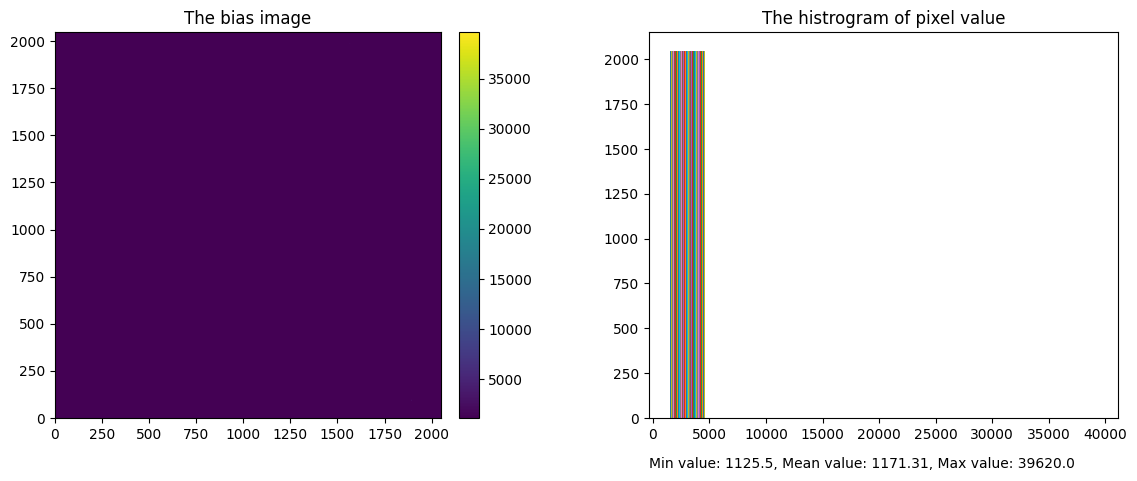

In [22]:
hdul = fits.open(MASTERDIR / "master_bias.fits")

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = axs[0].imshow(hdul[0].data,
                origin='lower',
                )
im2 = axs[1].hist(hdul[0].data,
                )

axs[0].set_title('The bias image')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

zimshow를 이용해 보자.

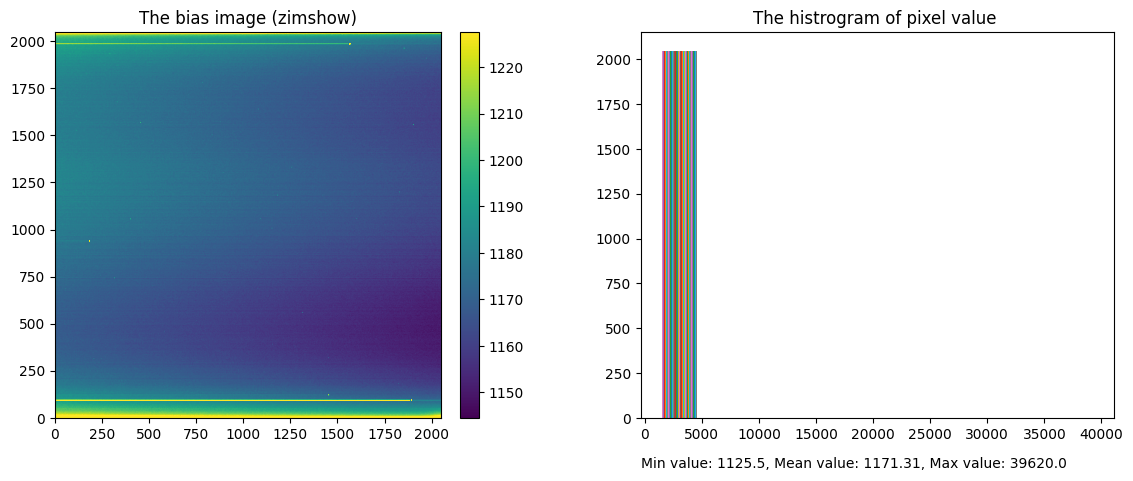

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _tool_visualization.zimshow(axs[0], 
                            hdul[0].data,
                            )
im2 = axs[1].hist(hdul[0].data,
                )

axs[0].set_title('The bias image (zimshow)')
axs[1].set_title('The histrogram of pixel value ')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

히스토그램 범위 변경

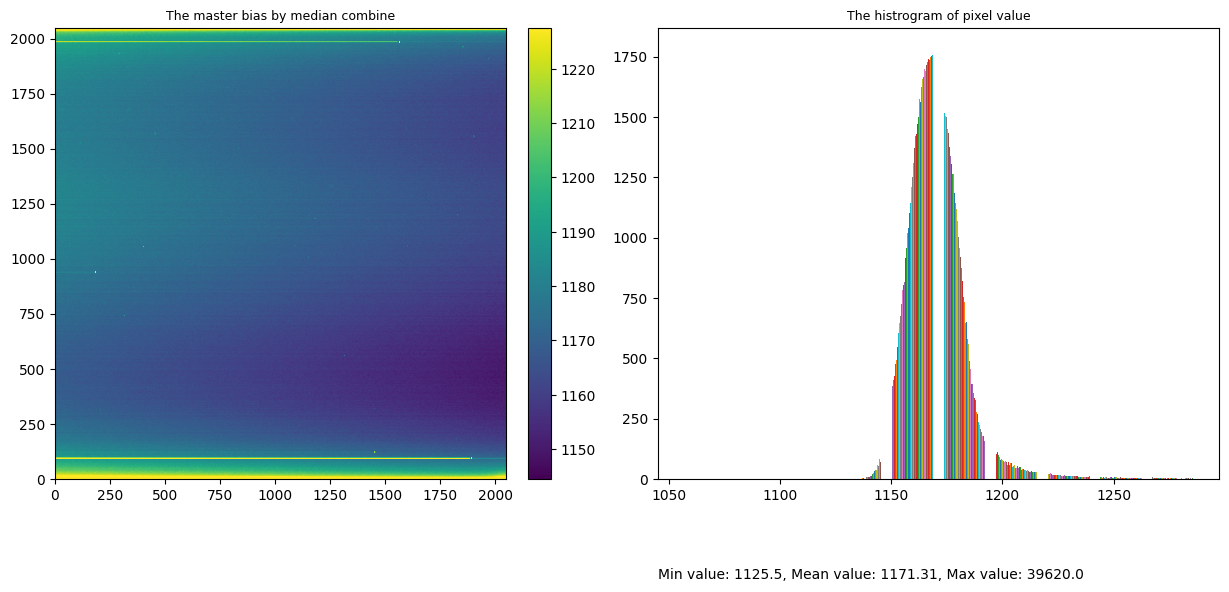

In [24]:
hdul = fits.open(MASTERDIR / "master_bias.fits")

fig, axs = plt.subplots(1, 2, figsize=(13, 6),
                        sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0],
            hdul[0].data,
            cmap='viridis',
            origin='lower',)

im2 = axs[1].hist(hdul[0].data,
                  range=(hdul[0].data.mean()*.9, hdul[0].data.mean()*1.1),
                  )

axs[0].set_title(f'The master bias by median combine', fontsize=9)
axs[1].set_title('The histrogram of pixel value', fontsize=9)

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}",
             xy=(0, -100), xycoords='axes pixels')
plt.tight_layout(pad=1.0)
plt.show()

### DARK

master dark 합성시에 group_key 값을 ["EXPTIME"] 으로 해주면 같은 노출 시간 끼리 합성해 준다.

In [25]:
help(yfu.group_combine)

Help on function group_combine in module ysfitsutilpy.imutil.imcombine:

group_combine(inputs, type_key=None, type_val=None, group_key=None, fmt=None, outdir=None, verbose=1, **kwargs)
    Combine sub-groups of FITS files from the given input.
    Parameters
    ----------
    inputs : DataFrame, glob pattern, list-like of path-like
        If `DataFrame`, it must be the summary table made by `make_summary`.
        The `~glob` pattern for files (e.g., ``"2020*[012].fits"``) or list of
        files (each element must be path-like or CCDData). Although it is not a
        good idea, a mixed list of CCDData and paths to the files is also
        acceptable. For the purpose of imcombine function, the best use is to
        use the `~glob` pattern or list of paths.

    type_key, type_val : str, list of str
        The header keyword for the ccd type, and the value you want to match.

    group_key : None, str, list of str, optional
        The header keyword which will be used to make gr

In [26]:
#dark_fits = summary[summary["IMAGETYP"] == "DARK"]["file"]
dark_fits = summary.loc[summary["IMAGETYP"] == "DARK"].copy()
dark_fits.reset_index(inplace=True)
dark_fits = dark_fits["file"]
print(type(dark_fits))
print(len(dark_fits))
print(dark_fits)

# Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
dark_comb = yfu.group_combine(
                dark_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["DARK"],
                group_key = ["EXPTIME"],
                fmt = "master_dark_{:.0f}sec.fits",  # output file name format
                outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose = True,
            )

<class 'pandas.core.series.Series'>
20
0     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
1     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
2     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
3     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
4     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
5     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
6     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
7     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
8     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
9     /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
10    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
11    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
12    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
13    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
14    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
15    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
16    /mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_...
17    /mn

DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]


Group and combine by ['EXPTIME'] (total 1 groups)
* 100.0... (20 files)


	/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_dark_100sec.fits
.................................(dt = 15.653 s) 2024-09-24T21:33:39.943


In [27]:
dark_fpaths = sorted(list((MASTERDIR).glob('*dark*.fit*')))
print(f"dark_fpaths: {dark_fpaths}")
print(f"len(dark_fpaths): {len(dark_fpaths)}")

dark_fpaths: [PosixPath('/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_dark_100sec.fits')]
len(dark_fpaths): 1


In [28]:
# hdul = fits.open(MASTERDIR / "master_bias.fits")

# fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

# im1 = axs[0].imshow(hdul[0].data)
# im2 = axs[1].hist(hdul[0].data 
#                     #histtype='step',
#                     #50 
#                     )

# axs[0].set_title('The dark image')
# axs[1].set_title('The histrogram of pixel value')

# plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Meax value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

# plt.colorbar(im1, fraction=0.035, pad=0.04)
# plt.tight_layout(pad=5.0)

## Flat

Master flat 합성시에 group_key 값을 ["FILTER"] 로 해주면 같은 필터 끼리 합성해 준다.

In [29]:
flat_fits = summary[summary["IMAGETYP"] == "FLAT"]["file"] 
# Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
flat_comb_norm = yfu.group_combine(
                flat_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["FLAT"],
                group_key = ["FILTER"],
                fmt = "master_flat_{:s}_norm.fits",  # output file name format
                scale="med_sc", #norm
                scale_to_0th=False, #norm
                outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose=True,
            )

# Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
flat_comb = yfu.group_combine(
                flat_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["FLAT"],
                group_key = ["FILTER"],
                fmt = "master_flat_{:s}.fits",  # output file name format
                #scale="med_sc", #norm
                #scale_to_0th=False, #norm
                outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose=True,
            )

Group and combine by ['FILTER'] (total 2 groups)
* B... (11 files)


DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]
DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]
DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]
DELMAG   =   0.0000            /Veriable - Comparison,   Delmag 

	/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_flat_B_norm.fits
* V... (32 files)


DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]
DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]
DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]
DELMAG   =   0.0000            /Veriable - Comparison,   Delmag 

	/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_flat_V_norm.fits
.................................(dt = 47.307 s) 2024-09-24T21:34:27.284


DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]


Group and combine by ['FILTER'] (total 2 groups)
* B... (11 files)


DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]


	/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_flat_B.fits
* V... (32 files)


	/mnt/Rdata/OBS_data/01-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_flat_V.fits
.................................(dt = 37.556 s) 2024-09-24T21:35:04.843


In [30]:
# hdul = fits.open(flat_fits[3])

# fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
# im = yvu.zimshow(axs, hdul[0].data)
# axs.set_title('The flat image')
# plt.colorbar(im, fraction=0.035, pad=0.04)
# plt.tight_layout()

In [31]:
# fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

# im1 = yvu.zimshow(axs[0], hdul[0].data)
# im2 = axs[1].hist(hdul[0].data 
#                     #histtype='step',
#                     #50 
#                     )

# axs[0].set_title('The flat image')
# axs[1].set_title('The histrogram of pixel value')

# plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

# plt.colorbar(im1, fraction=0.035, pad=0.04)
# plt.tight_layout(pad=5.0)

## Flat image

skyflat image

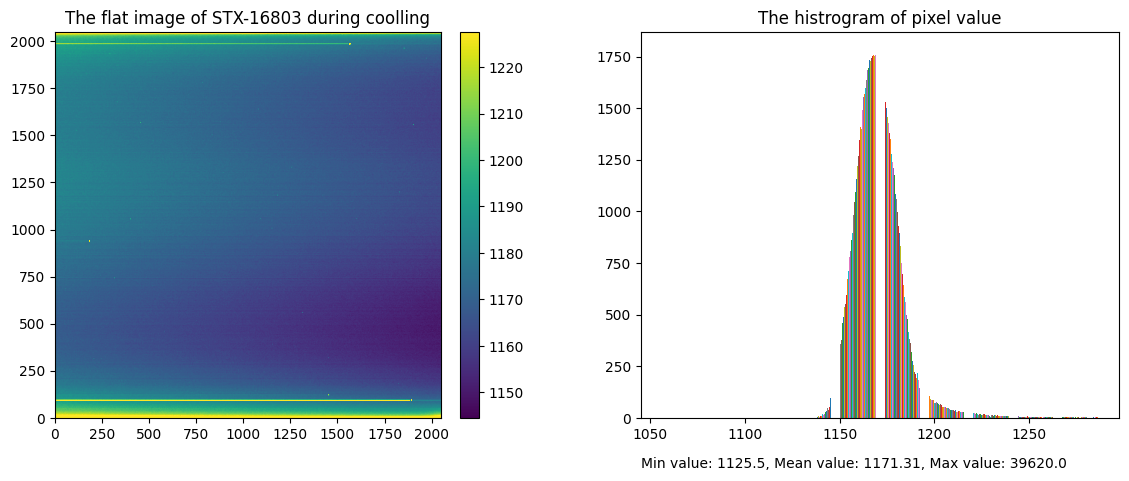

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

#im1 = yvu.zimshow(axs[0], hdul[0].data)
im1 = _astro_utilities.zimshow(axs[0], 
                               hdul[0].data)
im2 = axs[1].hist(hdul[0].data ,
                  range=(hdul[0].data.mean()*.9, hdul[0].data.mean()*1.1),
                    )

axs[0].set_title('The flat image of STX-16803 during coolling')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)